In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


Exploratory Data Analysis

In [3]:
df.YearBuilt.unique()

array([1969, 1980, 1970, 1996, 2001, 2020, 1993, 1957, 1959, 2004, 1951,
       1987, 1992, 1989, 1976, 1956, 1977, 1979, 1962, 1999, 1978, 1963,
       2013, 2002, 1952, 2014, 1965, 2006, 2008, 1982, 1966, 1971, 2021,
       1960, 2016, 2007, 1994, 1988, 2000, 2015, 1983, 1961, 1972, 2017,
       1985, 1975, 2012, 2019, 1995, 1986, 1981, 1954, 1958, 2005, 1984,
       1997, 2003, 1964, 2018, 1953, 1968, 1955, 1967, 1950, 1998, 1991,
       2010, 1973, 2011, 1990, 1974, 2009], dtype=int64)

In [4]:
yp = df.groupby('YearBuilt')['Price'].sum()

In [40]:
#buatlah lineplot untuk melihat perkembangan harga setiap tahun
# Line plot antara 'year' dan 'price' menggunakan Seaborn

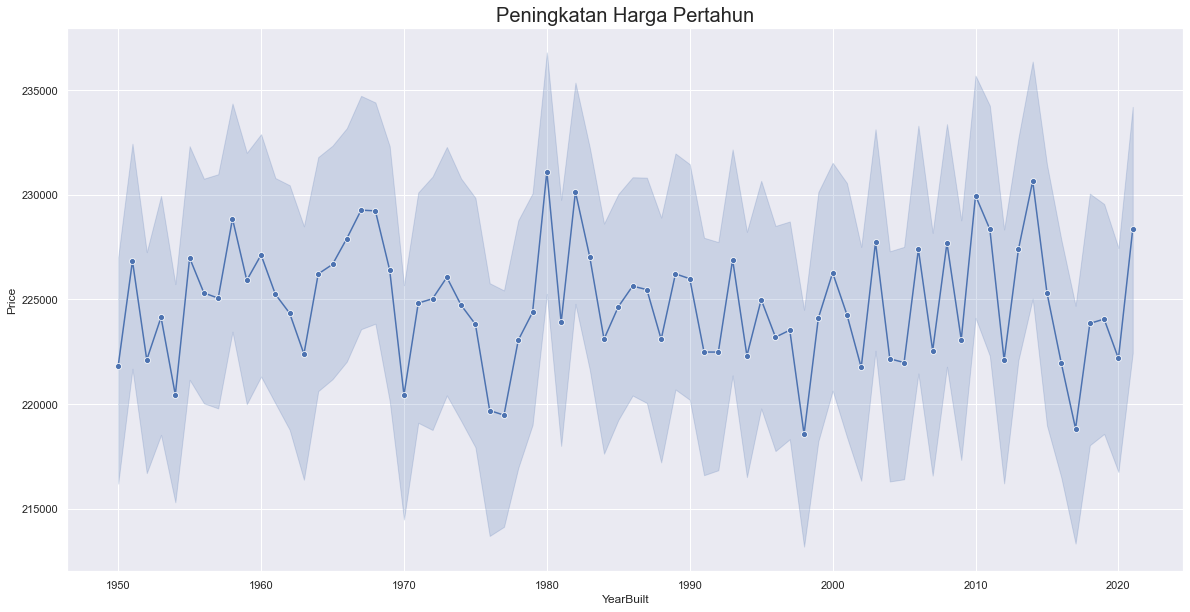

In [6]:
fig = plt.figure(figsize=(20,10))  
ax = sns.lineplot(data = df, x='YearBuilt', y='Price', marker='o')
plt.title('Peningkatan Harga Pertahun', fontsize=20)
plt.show() 

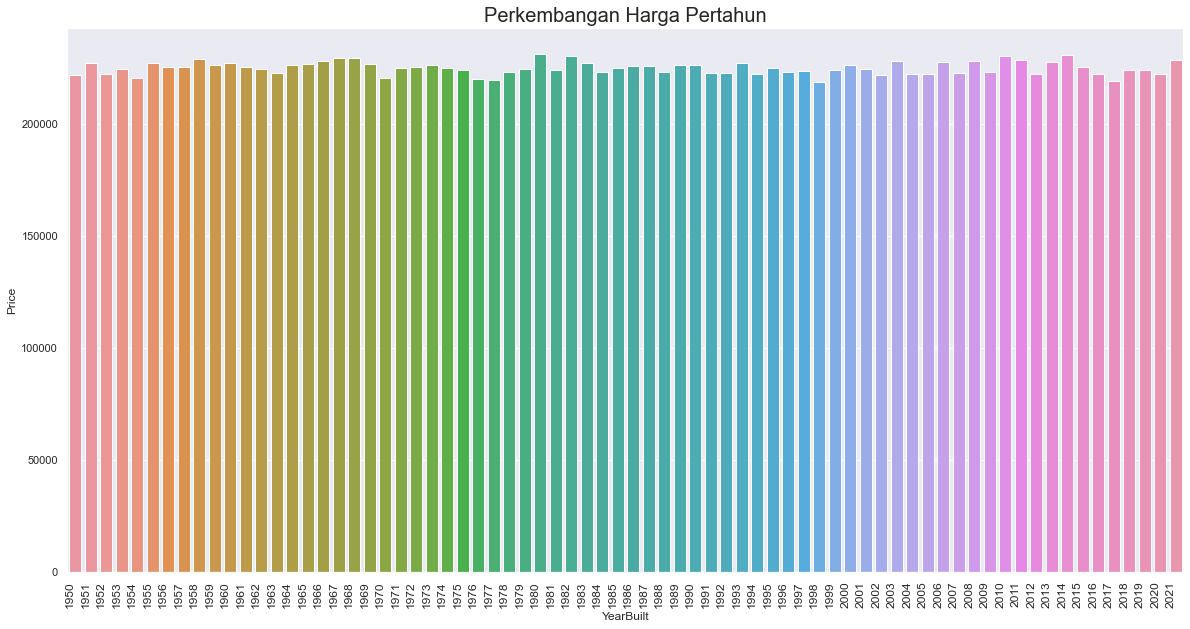

In [7]:
fig = plt.figure(figsize=(20,10))  
ax = sns.barplot(data = df, x='YearBuilt', y='Price', ci=None)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.title('Perkembangan Harga Pertahun', fontsize=20)
plt.show() 

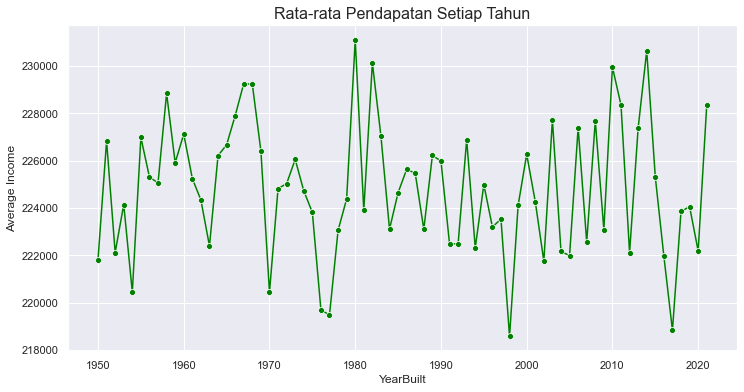

In [8]:
average_income_per_year = df.groupby('YearBuilt')['Price'].mean().reset_index()

# Line plot untuk melihat rata-rata pendapatan setiap tahun
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_income_per_year, x='YearBuilt', y='Price', marker='o', color='green')
plt.title('Rata-rata Pendapatan Setiap Tahun', fontsize=16)
plt.xlabel('YearBuilt', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.show()

In [9]:
average_income_per_year.sort_values(by = 'Price', ascending=False)

,YearBuilt,Price
30,1980,231107.769768
64,2014,230649.864125
32,1982,230137.969036
60,2010,229960.436421
17,1967,229265.248590
...,...,...
20,1970,220440.380292
26,1976,219697.971933
27,1977,219481.714060
67,2017,218834.416354


In [10]:
filtered_data = average_income_per_year[(average_income_per_year['YearBuilt'] >= 2010) & (average_income_per_year['YearBuilt'] <= 2020)]
# Menampilkan data harga untuk tahun 2010-2020 urutkan dari pendapatan terendah
filtered_data.sort_values(by='Price', ascending=True) #terendah tahun 2917

,YearBuilt,Price
67,2017,218834.416354
66,2016,221964.851792
62,2012,222108.950565
70,2020,222185.367714
68,2018,223858.330309
69,2019,224064.205270
65,2015,225313.153356
63,2013,227387.075232
61,2011,228357.087042
60,2010,229960.436421


In [12]:
#mengurutkan data kolom price berdasarkan harga tertinggi 
df.sort_values(by = 'Price',ascending=False)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
7430,2758,5,2,Rural,1967,492195.259972
46610,2957,5,1,Suburb,2001,482577.163405
26930,2995,5,2,Urban,1954,476671.733263
3784,2901,2,3,Urban,1996,470989.679074
21815,2998,3,2,Urban,1995,468493.877841
...,...,...,...,...,...,...
5118,1140,4,1,Urban,2020,-23911.003119
8720,1235,3,1,Urban,1952,-24183.000515
1266,1024,2,2,Urban,2006,-24715.242482
17706,1080,5,1,Rural,1955,-28774.998022


In [13]:
df[(df['Price'] == 492195.2599720151)]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
7430,2758,5,2,Rural,1967,492195.259972


In [14]:
#Buatlah barplot untuk menampilkan neghboarhood rata-rata price tertinggi


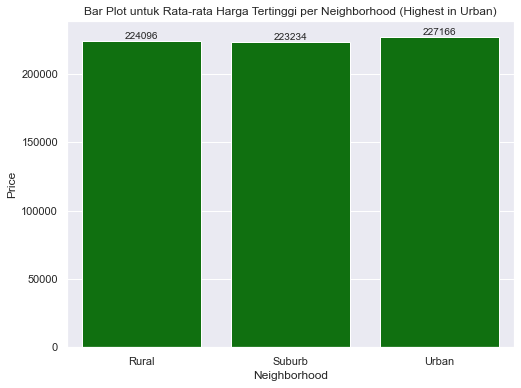

In [15]:
# Menghitung rata-rata harga per neighborhood
average_price = df.groupby('Neighborhood')['Price'].mean().reset_index()

# Mengidentifikasi neighborhood dengan rata-rata harga tertinggi
highest_avg_price_neighborhood = average_price.loc[average_price['Price'].idxmax()]['Neighborhood']

# Bar plot untuk menampilkan rata-rata harga tertinggi berdasarkan neighborhood
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Neighborhood', y='Price', data=average_price, color='green')
ax.bar_label(ax.containers[0])
# Menambahkan label sumbu dan judul
plt.title(f'Bar Plot untuk Rata-rata Harga Tertinggi per Neighborhood (Highest in {highest_avg_price_neighborhood})')

plt.show()

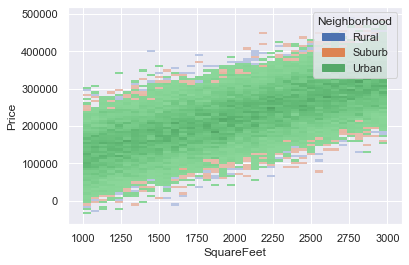

In [75]:
sns.histplot(data = df, x = 'SquareFeet', y = 'Price', hue = 'Neighborhood')
plt.show()

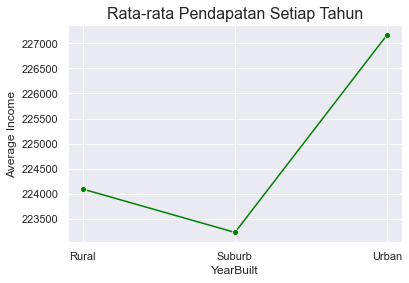

In [16]:
sns.lineplot(data=average_price, x='Neighborhood', y='Price', marker='o', color='green')
plt.title('Rata-rata Pendapatan Setiap Tahun', fontsize=16)
plt.xlabel('YearBuilt', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.show()

In [17]:
df.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626


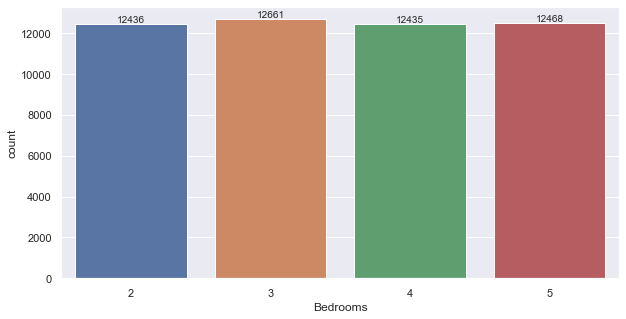

In [49]:
#melihat dari kolom Bedrooms nilai pling banyk berapa?
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Bedrooms', data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [55]:
#dsri viduslidsdi diatas diketahui bedrooms 3 paling banyk
#lalu cari berapa si rata rata harga dari bedroms 3
df[(df['Bedrooms'] == 3)]['Price'].mean()

221057.88049583256

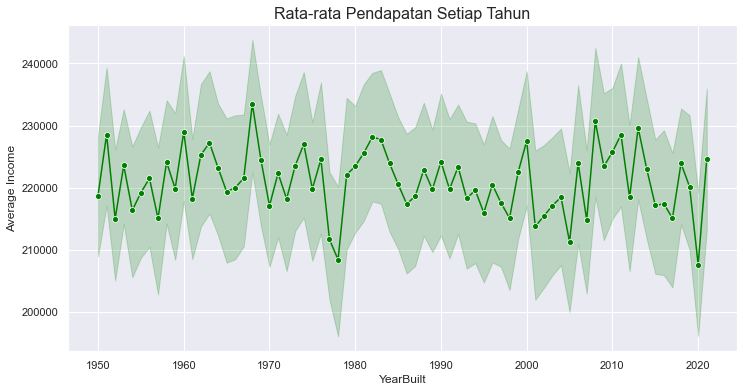

In [58]:
dfbed = df[(df['Bedrooms'] == 3)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfbed, x='YearBuilt', y='Price', marker='o', color='green')
plt.title('Rata-rata Pendapatan Setiap Tahun', fontsize=16)
plt.xlabel('YearBuilt', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.show()

In [41]:
#buatlah boxplot untuk kolom Squacreel, Bathroom, YearBuit

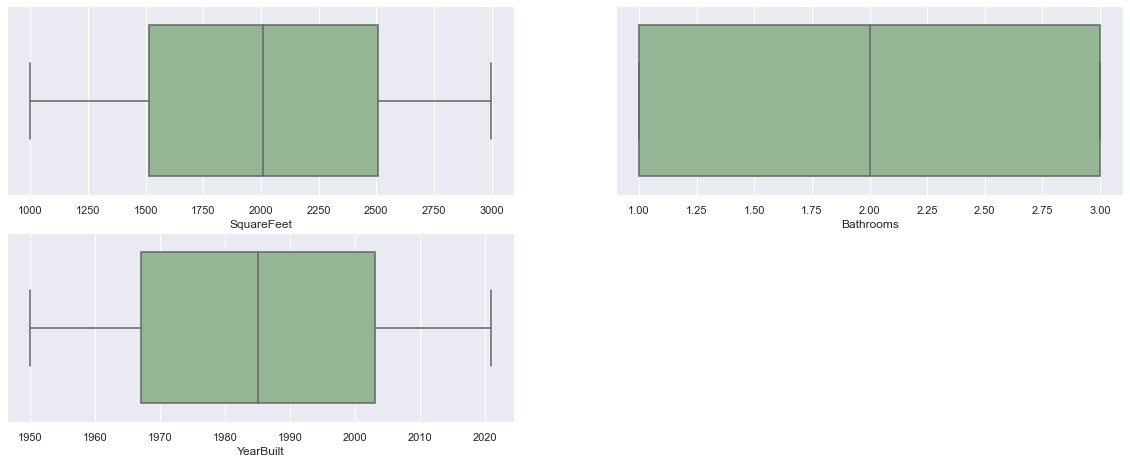

In [19]:
fig = plt.figure(figsize = (20,16))

# Plotting boxplots
nbin_var = df[['SquareFeet', 'Bathrooms', 'YearBuilt']]
for i, v in enumerate(nbin_var):
    axes = fig.add_subplot(4, 2, i+1)
    sns.boxplot(x = v, data = df, ax = axes, color='#8FBC8F')

In [59]:
#Buatkan histplot untuk kolom Squacreel, Bathroom, YearBuit

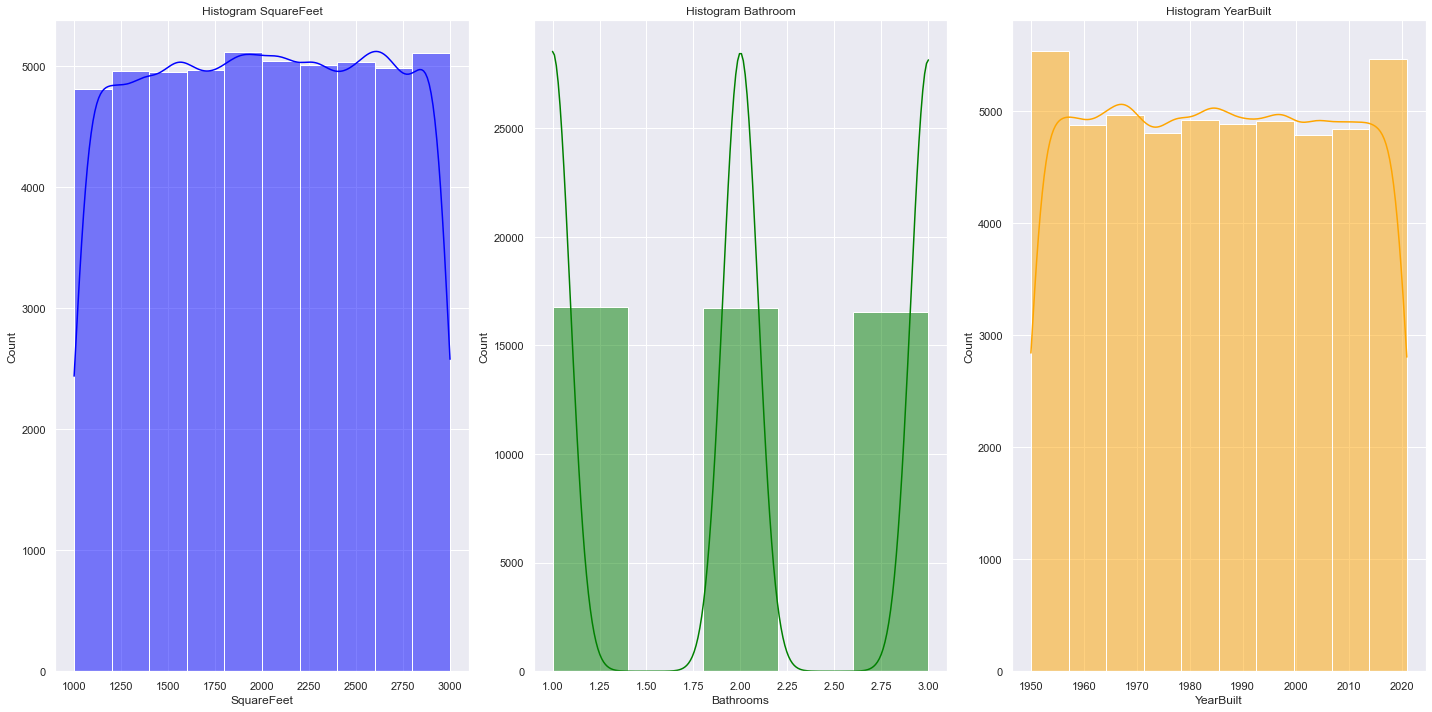

In [21]:
# Histogram plot untuk kolom SquareFeet, Bathroom, dan YearBuilt
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
sns.histplot(df['SquareFeet'], bins=10, kde=True, color='blue')
plt.title('Histogram SquareFeet')

plt.subplot(1, 3, 2)
sns.histplot(df['Bathrooms'], bins=5, kde=True, color='green')
plt.title('Histogram Bathroom')

plt.subplot(1, 3, 3)
sns.histplot(df['YearBuilt'], bins=10, kde=True, color='orange')
plt.title('Histogram YearBuilt')

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='SquareFeet', ylabel='Count'>

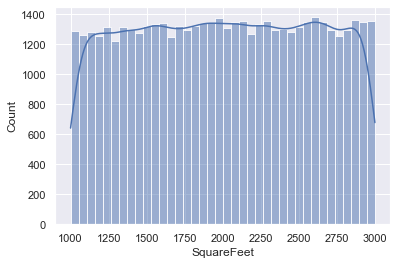

In [22]:
sns.histplot(data=df, x="SquareFeet", kde=True)


In [67]:
df.SquareFeet.max()

2999

In [69]:
df[(df['SquareFeet'] == 2999)]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Neighborhood_encoded
2388,2999,2,3,Suburb,1964,322064.145665,1
2845,2999,5,2,Urban,1999,461502.014630,2
4922,2999,4,1,Suburb,1996,287295.368703,1
6256,2999,4,3,Urban,1955,349488.128781,2
8634,2999,4,3,Rural,1953,352582.531506,0
11120,2999,2,3,Suburb,1972,237828.098288,1
13399,2999,2,3,Rural,2002,335823.052091,0
16957,2999,2,3,Suburb,1950,294490.116885,1
17804,2999,3,2,Urban,1976,261529.600659,2
21286,2999,3,2,Rural,1981,263076.275799,0


In [63]:
df.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Neighborhood_encoded
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0


In [64]:
df.SquareFeet.min()

1000

<AxesSubplot: xlabel='Bathrooms', ylabel='Count'>

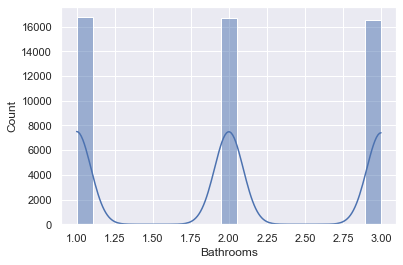

In [24]:
sns.histplot(data=df, x="Bathrooms", kde=True)

<AxesSubplot: xlabel='YearBuilt', ylabel='Count'>

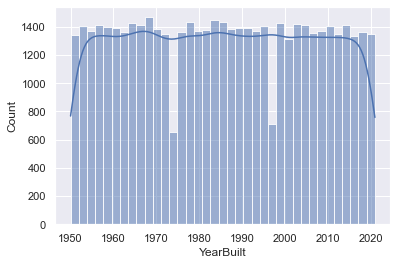

In [25]:
sns.histplot(data=df, x="YearBuilt", kde=True)

In [26]:
df.isnull().sum()
#tidak ada missing value

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [27]:
df.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626


In [28]:
#label encoding untuk mengubah objek ke bentuk float
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'Neighborhood'
df['Neighborhood_encoded'] = label_encoder.fit_transform(df['Neighborhood'])

# Menampilkan DataFrame setelah label encoding
print(df[['Neighborhood', 'Neighborhood_encoded']])

      Neighborhood  Neighborhood_encoded
0            Rural                     0
1            Rural                     0
2           Suburb                     1
3            Urban                     2
4           Suburb                     1
...            ...                   ...
49995        Rural                     0
49996       Suburb                     1
49997       Suburb                     1
49998        Rural                     0
49999        Rural                     0

[50000 rows x 2 columns]


In [29]:
df.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Neighborhood_encoded
0,2126,4,1,Rural,1969,215355.283618,0
1,2459,3,2,Rural,1980,195014.221626,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(['Neighborhood'], axis=1)  # Menghilangkan kolom 'Neighborhood' dan 'Price' dari fitur
y = df['Neighborhood_encoded']

# Memisahkan fitur (X) dan target (y)
#X = df.drop(['Price'], axis=1)
#y = df['Price']

# Melakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Melakukan train-test split dengan proporsi 80% train dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran setiap set
print("Jumlah data pada X_train:", len(X_train))
print("Jumlah data pada X_test:", len(X_test))
print("Jumlah data pada y_train:", len(y_train))
print("Jumlah data pada y_test:", len(y_test))

Jumlah data pada X_train: 40000
Jumlah data pada X_test: 10000
Jumlah data pada y_train: 40000
Jumlah data pada y_test: 10000


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
#menembahkan hyperparameter tuning di setiap algoritma yang digunakan
# Hyperparameter tuning untuk Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(estimator=dt_regressor, param_grid=dt_param_grid, cv=3, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)
print("Decision Tree Regressor - Parameter Terbaik:", dt_grid_search.best_params_)

# Prediksi menggunakan model dengan parameter terbaik
dt_y_pred = dt_grid_search.predict(X_test)

Decision Tree Regressor - Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [34]:
# Hyperparameter tuning untuk Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
print("Random Forest Regressor - Parameter Terbaik:", rf_grid_search.best_params_)


rf_y_pred = rf_grid_search.predict(X_test)



Random Forest Regressor - Parameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [35]:
# Hyperparameter tuning untuk Linear Regression
lr_regressor = LinearRegression()
lr_param_grid = {'fit_intercept': [True, False]}
lr_grid_search = GridSearchCV(estimator=lr_regressor, param_grid=lr_param_grid, cv=3, scoring='neg_mean_squared_error')
lr_grid_search.fit(X_train, y_train)
print("Linear Regression - Parameter Terbaik:", lr_grid_search.best_params_)

lr_y_pred = lr_grid_search.predict(X_test)

Linear Regression - Parameter Terbaik: {'fit_intercept': False}


Proses paling lama random forest, decision tree dan paling cepat linear regression

In [36]:
#fit training data di setiap algoritma
# Inisialisasi model dengan parameter terbaik
dt_best_params = {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1}
dt_regressor = DecisionTreeRegressor(**dt_best_params)

rf_best_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4}
rf_regressor = RandomForestRegressor(**rf_best_params)

lr_best_params = {'fit_intercept': True}
lr_regressor = LinearRegression(**lr_best_params)

# Melatih model pada data pelatihan
dt_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
lr_regressor.fit(X_train, y_train)

# Prediksi pada data uji
dt_y_pred = dt_regressor.predict(X_test)
rf_y_pred = rf_regressor.predict(X_test)
lr_y_pred = lr_regressor.predict(X_test)

In [37]:
#menampilkan hasil R2, MSE, MAE, RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Menghitung metrik untuk Decision Tree Regressor
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)

# Menghitung metrik untuk Random Forest Regressor
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

# Menghitung metrik untuk Linear Regression
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(lr_mse)

# Menampilkan hasil
print("Decision Tree Regressor:")
print("R2 Score:", dt_r2)
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("\n")

print("Random Forest Regressor:")
print("R2 Score:", rf_r2)
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("\n")

print("Linear Regression:")
print("R2 Score:", lr_r2)
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)

Decision Tree Regressor:
R2 Score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


Random Forest Regressor:
R2 Score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


Linear Regression:
R2 Score: 1.0
MAE: 6.768202810585902e-16
MSE: 6.705672361439567e-31
RMSE: 8.188816985034876e-16


In [38]:
# Menampilkan Feature Importance untuk Decision Tree Regressor
dt_feature_importance = dt_regressor.feature_importances_
dt_feature_importance_dict = dict(zip(X.columns, dt_feature_importance))
print("Feature Importance for Decision Tree Regressor:")
print(dt_feature_importance_dict)
print("\n")

# Menampilkan Feature Importance untuk Random Forest Regressor
rf_feature_importance = rf_regressor.feature_importances_
rf_feature_importance_dict = dict(zip(X.columns, rf_feature_importance))
print("Feature Importance for Random Forest Regressor:")
print(rf_feature_importance_dict)
print("\n")

# Menampilkan Koefisien untuk Linear Regression
lr_coefficients = lr_regressor.coef_
lr_coefficients_dict = dict(zip(X.columns, lr_coefficients))
print("Coefficients for Linear Regression:")
print(lr_coefficients_dict)

Feature Importance for Decision Tree Regressor:
{'SquareFeet': 0.0, 'Bedrooms': 0.0, 'Bathrooms': 0.0, 'YearBuilt': 0.0, 'Price': 0.0, 'Neighborhood_encoded': 1.0}


Feature Importance for Random Forest Regressor:
{'SquareFeet': 0.0, 'Bedrooms': 0.0, 'Bathrooms': 0.0, 'YearBuilt': 0.0, 'Price': 0.0, 'Neighborhood_encoded': 1.0}


Coefficients for Linear Regression:
{'SquareFeet': 1.0724339657853019e-19, 'Bedrooms': 1.916324692890169e-17, 'Bathrooms': -5.142347737874829e-16, 'YearBuilt': 9.521335307869964e-18, 'Price': -3.595558847414861e-22, 'Neighborhood_encoded': 1.0000000000000009}


kesimpulan dari ke 3 model diatas dinyatakan bahwa algoritma decision tree dengan random forest merupakan algoritma terbaik yang dilakukan pada datai tersebut